In [1]:
from linares_plot import *
import statsmodels.formula.api as smf


In [2]:
data = pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\idibaps_psychophysics_rt')

In [6]:
df_controls = data.loc[data['type']==0]
df_controls.head()

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,0.0,1,1,NaN,NaN
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,0.0,1,1,NaN,NaN
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,0.0,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,0.0,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,0.0,1,1,NaN,NaN


In [7]:
df_controls.columns

Index(['Unnamed: 0', 'r_T', 'r_NT', 'delay', 'type', 'A_T', 'A_NT', 'A_err',
       'r_err', 'A_R', 'r_R', 'RT', 'subject', 'session', 'Int_A_err',
       'Int_r_err'],
      dtype='object')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


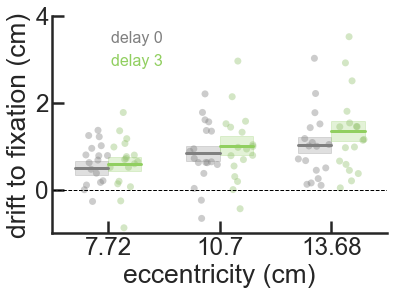

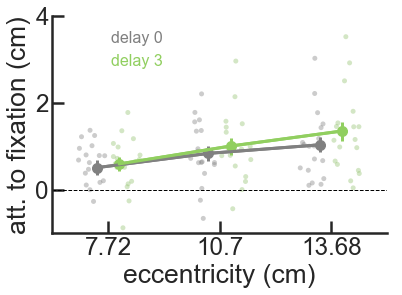

In [8]:
c_d0='grey'
c_d3 = '#91cf60'
df_controls['delay_n']=df_controls['delay'].copy()
df_controls['delay_n']=df_controls['delay_n'].replace([0,3], ['delay 0', 'delay 3'])


#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=7,   CI=0.68,
             by_subj=True, subj_col='subject',
             plot_box=True, fill_box=True, reps=1000, alpha_box=0.25, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('drift to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()

print('')

#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=5,   CI=0.68,
             by_subj=True, subj_col='subject', LW=3, MS=10,
             plot_box='line', reps=1000, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()


In [9]:
res_m = smf.mixedlm(formula='r_err ~ r_T * delay', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err     
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              0.9515    
Min. group size:  72      Likelihood:         -4786.2985
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.163    0.198 -0.823 0.410 -0.550  0.225
r_T            0.088    0.010  9.072 0.000  0.069  0.107
delay         -0.078    0.050 -1.554 0.120 -0.177  0.020
r_T:delay      0.013    0.005  2.865 0.004  0.004  0.022
Group Var      0.497    0.177                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


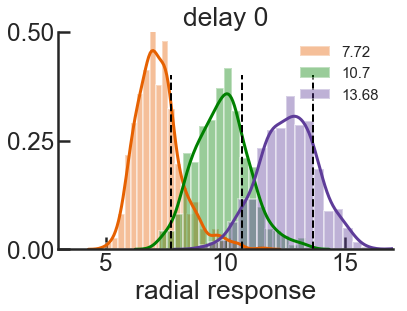

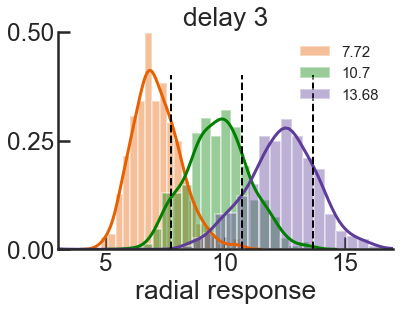

In [10]:

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


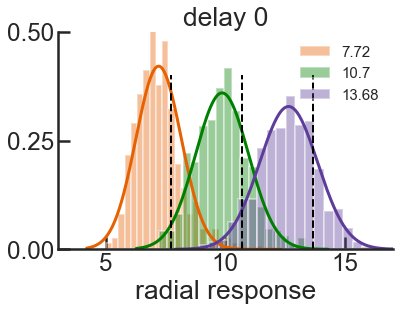

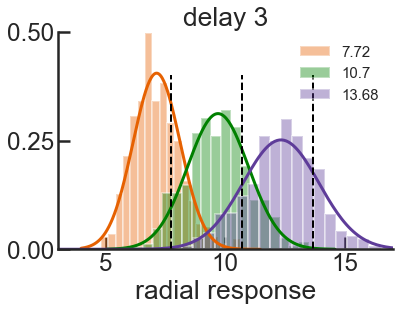

In [11]:
from scipy.stats import norm

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Serial biases radial dimension

In [3]:
data.head(10)

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,0.0,1,1,NaN,NaN
1,1,10.70,7.72,0.0,4.0,319.0,319.0,4.70,-1.17,314.30,11.87,0.0,1,1,NaN,-1.17
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,0.0,1,1,NaN,NaN
3,3,13.68,13.68,3.0,1.0,227.0,215.0,-3.86,2.12,230.86,11.56,0.0,1,1,-3.86,NaN
4,4,7.72,10.70,3.0,3.0,311.0,311.0,4.23,1.07,306.77,6.65,0.0,1,1,NaN,-1.07
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,0.0,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,0.0,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,0.0,1,1,NaN,NaN
8,8,10.70,NaN,3.0,0.0,123.0,NaN,-8.07,2.23,131.07,8.47,0.0,1,1,NaN,NaN
9,9,13.68,7.72,3.0,4.0,308.0,308.0,1.23,-0.07,306.77,13.75,0.0,1,1,NaN,-0.07


In [61]:
##columna con previous trial, 2 back and 3 back
serial_b = []
for subject in data.subject.unique():
    df_subj = data.loc[data['subject']==subject]
    for session in df_subj.session.unique():
        df_sess = df_subj.loc[df_subj['session']==session]
        for n_back in range(1,13):
            back_n = list(df_sess['r_T'][:-n_back].values)
            ###[back_n.insert(0,  0) for i in range(n_back)]
            [back_n.insert(0,  0) for i in range(n_back)]
            name_col = 'rT_' + str(n_back)
            df_sess[name_col]=back_n
            serial_b.append(df_sess)
            
#
serial_b=pd.concat(serial_b)
# serial_b=serial_b.loc[(serial_b['rT_1']!='None') & (serial_b['rT_2']!='None') & (serial_b['rT_3']!='None')
#                       & (serial_b['rT_4']!='None')  & (serial_b['rT_5']!='None')]

serial_b = serial_b.astype({"rT_1": float, "rT_2": float,"rT_3": float,"rT_4": float,"rT_5": float,
                           "rT_6": float,"rT_7": float, "rT_8": float, "rT_9": float,"rT_10": float, 
                            "rT_11": float, "rT_12": float})
    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [62]:
res_m = smf.mixedlm(formula='r_err ~ r_T + rT_1 + rT_2 + rT_3 + rT_4 + + rT_5 + rT_6 + rT_7 + rT_8 + rT_9 + rT_10 + rT_11+ rT_12', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.1475      
Min. group size:  2004    Likelihood:         -146280.7090
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -0.342     0.166   -2.063  0.039  -0.667  -0.017
r_T         0.113     0.001   86.210  0.000   0.111   0.116
rT_1       -0.023     0.001  -18.395  0.000  -0.026  -0.021
rT_2       -0.004     0.001   -2.898  0.004  -0.006  -0.001
rT_3        0.007     0.001    6.025  0.000   0.005   0.010
rT_4        0.005     0.001    4.291  0.000   0.003   0.008
rT_5        0.003     0.001    2.519  0.012   0.001   0.00

In [83]:
res_m = smf.mixedlm(formula='r_err ~ rT_7', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.2400      
Min. group size:  2004    Likelihood:         -150024.4951
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
              Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     0.762     0.164  4.662  0.000   0.442   1.083
rT_7          0.000     0.001  0.063  0.950  -0.002   0.002
Group Var     0.479     0.150                              



In [106]:
serial_b7 = serial_b.loc[serial_b['rT_1']!=0]
res_m = smf.mixedlm(formula='r_err ~ rT_1', 
                    data=serial_b7, groups=serial_b7['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 97632   Method:             REML        
No. Groups:       18      Scale:              1.2344      
Min. group size:  1992    Likelihood:         -148886.1017
Max. group size:  7428    Converged:          Yes         
Mean group size:  5424.0                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   1.060     0.164    6.471  0.000   0.739   1.381
rT_1       -0.028     0.001  -20.294  0.000  -0.030  -0.025
Group Var   0.479     0.150                                



In [99]:
res_m = smf.mixedlm(formula='r_err ~ r_T + rT_1 + rT_2 + rT_3 + rT_4 + + rT_5 + rT_6', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.1476      
Min. group size:  2004    Likelihood:         -146253.6064
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -0.347     0.166   -2.091  0.037  -0.671  -0.022
r_T         0.113     0.001   86.215  0.000   0.111   0.116
rT_1       -0.023     0.001  -18.410  0.000  -0.026  -0.021
rT_2       -0.004     0.001   -2.994  0.003  -0.006  -0.001
rT_3        0.007     0.001    5.924  0.000   0.005   0.010
rT_4        0.005     0.001    4.177  0.000   0.003   0.007
rT_5        0.003     0.001    2.297  0.022   0.000   0.00

In [23]:
df_sess

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err,rT_-1,rT_-2,rT_-3
8018,8018,10.70,NaN,0.0,0.0,221.0,NaN,-4.00,1.88,225.00,8.82,0.00,18,3,NaN,NaN,None,None,None
8019,8019,7.72,13.68,3.0,3.0,133.0,133.0,-7.78,0.73,140.78,6.99,0.00,18,3,NaN,-0.73,10.7,None,None
8020,8020,7.72,13.68,0.0,3.0,301.0,301.0,-2.36,0.74,303.36,6.98,0.00,18,3,NaN,-0.74,7.72,10.7,None
8021,8021,13.68,NaN,0.0,0.0,123.0,NaN,-6.91,1.53,129.91,12.15,0.00,18,3,NaN,NaN,7.72,7.72,10.7
8022,8022,10.70,NaN,0.0,0.0,58.0,NaN,2.63,2.30,55.37,8.40,0.00,18,3,NaN,NaN,13.68,7.72,7.72
8023,8023,7.72,NaN,3.0,0.0,214.0,NaN,-7.40,1.79,221.40,5.93,0.00,18,3,NaN,NaN,10.7,13.68,7.72
8024,8024,13.68,NaN,3.0,0.0,212.0,NaN,-2.73,2.06,214.73,11.62,0.00,18,3,NaN,NaN,7.72,10.7,13.68
8025,8025,7.72,7.72,0.0,1.0,53.0,33.0,-7.46,1.66,60.46,6.06,0.00,18,3,-7.46,NaN,13.68,7.72,10.7
8026,8026,7.72,NaN,0.0,0.0,323.0,NaN,-0.29,1.25,323.29,6.47,0.00,18,3,NaN,NaN,7.72,13.68,7.72
8027,8027,7.72,7.72,3.0,1.0,123.0,107.0,-21.89,1.81,144.89,5.91,0.00,18,3,-21.89,NaN,7.72,7.72,13.68


In [18]:
back1_r = list(df_sess['r_T'][:-1].values)
back1_r.insert(0,'None')

back2_r = list(df_sess['r_T'][:-2].values)
[back2_r.insert(0,'None') for i in range(2)]

back3_r = list(df_sess['r_T'][:-3].values)
[back3_r.insert(0,'None') for i in range(3)]



['None',
 'None',
 'None',
 10.7,
 7.72,
 7.72,
 13.68,
 10.7,
 7.72,
 13.68,
 7.72,
 7.72,
 7.72,
 10.7,
 7.72,
 13.68,
 7.72,
 13.68,
 7.72,
 7.72,
 10.7,
 7.72,
 7.72,
 7.72,
 10.7,
 10.7,
 7.72,
 7.72,
 7.72,
 13.68,
 10.7,
 13.68,
 13.68,
 7.72,
 13.68,
 13.68,
 7.72,
 10.7,
 7.72,
 7.72,
 7.72,
 7.72,
 10.7,
 7.72,
 10.7,
 13.68,
 10.7,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 10.7,
 10.7,
 13.68,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 10.7,
 13.68,
 13.68,
 10.7,
 10.7,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 7.72,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 10.7,
 13.68,
 7.72,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 7.72,
 10.7,
 7.72,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 13.68,
 10.7,
 10.7,
 7.72,
 13.68,
 10.7,
 7.72,
 7.72,
 10.7,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 10.7,
 7.72,
 10.7,
 10.7,
 7.72,
 7.72,
 10.7,
 13.68,

In [4]:
data.subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

In [12]:
res_m = smf.mixedlm(formula='r_T ~ r_err', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_T       
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              5.5498    
Min. group size:  72      Likelihood:         -7747.1994
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     10.196    0.106 96.252 0.000  9.989 10.404
r_err          0.577    0.041 13.910 0.000  0.496  0.659
Group Var      0.146    0.027                           



In [15]:
res_m = smf.mixedlm(formula='r_T ~ r_err*delay', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_T       
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              5.5487    
Min. group size:  72      Likelihood:         -7751.7097
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     10.223    0.118 86.295 0.000  9.991 10.455
r_err          0.610    0.059 10.289 0.000  0.494  0.726
delay         -0.023    0.033 -0.685 0.493 -0.088  0.042
r_err:delay   -0.015    0.022 -0.650 0.516 -0.058  0.029
Group Var      0.152    0.028                           



In [40]:
sample= {'Maths': [90, 80, 70, 60, 50, 40, 30, 20], 'English': [77, 66, 55, 44, 33, 66, 44, 11],
        'Work': [76, 75, 72, 66, 66, 63, 62, 61] ,'Brains': [33, 66, 22, 44, 11, 66, 55, 11]}

DD = pd.DataFrame(sample,columns= ['Maths', 'English', 'Work', 'Brains'])
DD

,Maths,English,Work,Brains
0,90,77,76,33
1,80,66,75,66
2,70,55,72,22
3,60,44,66,44
4,50,33,66,11
5,40,66,63,66
6,30,44,62,55
7,20,11,61,11


In [59]:
res = smf.ols(formula='Maths + English ~  Work + Brains', data=DD).fit()
#print(res.summary())
res.

In [42]:
import statsmodels.multivariate.multivariate_ols as smmv 
res_m = smmv._MultivariateOLS.from_formula(formula='Maths + English ~  Work + Brains', data=DD).fit()
print(res_m.summary())

NotImplementedError: 

In [52]:
res_m.summary()

NotImplementedError: 

In [33]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.multivariate.multivariate_ols as smmv 

sampleY = {'Maths': [90, 80, 70, 60, 50, 40, 30, 20], 'English': [77, 66, 55, 44, 33, 66, 44, 11]}
sampleX = {'Work': [76, 75, 72, 66, 66, 63, 62, 61] ,'Brains': [33, 66, 22, 44, 11, 66, 55, 11]}

Y = pd.DataFrame(sampleY,columns= ['Maths', 'English'])
#Y = pd.DataFrame(sampleY,columns= ['Maths'])

X = pd.DataFrame(sampleX,columns= ['Work', 'Brains'])

Xc = sm.add_constant(X)

linear_regression = smmv._MultivariateOLS(Y,Xc)
#linear_regression = sm.OLS(Y,Xc) #- this one works, but of course only with a single DV, i.e. Y = pd.DataFrame(sampleY,columns= ['Maths'])
fitted_model = linear_regression.fit()
fitted_model.summary()

NotImplementedError: 

In [35]:
A = smmv._MultivariateOLS(Y,Xc)

In [37]:
B = A.fit()

In [39]:
B.summary()

NotImplementedError: 